<a href="https://colab.research.google.com/github/naikshrey2308/ML_Labs/blob/main/ML_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression using `PyTorch`

Import the required modules

In [ ]:
import numpy as np
import torch

Generate the required training data

In [ ]:
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69,96, 70], 
                   [73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96,70]], dtype='float32')

targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119], 
                    [56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119], 
                    [56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

inputs2 = inputs.copy()
targets2 = targets.copy()

In [ ]:
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
# alpha = 0.1
alpha = 1e-7
model = linearRegression(inputs.size()[1], targets.size()[1])
# epochs = min(100, inputs.size()[0])
epochs = 1000

criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

loss_values = []
epoch_values = [(i + 1) for i in range(epochs)]

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss_values.append(loss.detach().numpy())
    if epoch == 0 or epoch == epochs - 1:
        print(loss)
    loss.backward()
    optimizer.step()

print(list(model.parameters()))

tensor(11136.0273, grad_fn=<MseLossBackward0>)
tensor(1304.9304, grad_fn=<MseLossBackward0>)
[Parameter containing:
tensor([[ 0.5663,  0.2077, -0.0958],
        [ 0.7588,  0.1449,  0.1415]], requires_grad=True), Parameter containing:
tensor([-0.1158, -0.0269], requires_grad=True)]


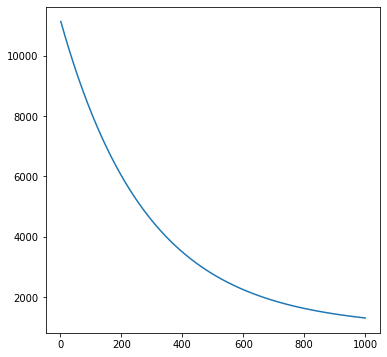

In [ ]:
# Plotting a graph of number of epochs vs loss
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(epoch_values, loss_values)
plt.show()

In [ ]:
predicted = model(Variable(inputs)).data.numpy()
predicted = Variable(torch.from_numpy(predicted))
for i in range(len(predicted)):
    print(predicted[i], targets[i], abs(predicted[i] - targets[i]))

tensor([57.1369, 70.3507]) tensor([56., 70.]) tensor([1.1369, 0.3507])
tensor([ 82.2238, 100.6435]) tensor([ 81., 101.]) tensor([1.2238, 0.3565])
tensor([118.6997, 132.9529]) tensor([119., 133.]) tensor([0.3003, 0.0471])
tensor([21.0857, 37.0104]) tensor([22., 37.]) tensor([0.9143, 0.0104])
tensor([101.9139, 119.1433]) tensor([103., 119.]) tensor([1.0861, 0.1433])
tensor([57.1369, 70.3507]) tensor([56., 70.]) tensor([1.1369, 0.3507])
tensor([ 82.2238, 100.6435]) tensor([ 81., 101.]) tensor([1.2238, 0.3565])
tensor([118.6997, 132.9529]) tensor([119., 133.]) tensor([0.3003, 0.0471])
tensor([21.0857, 37.0104]) tensor([22., 37.]) tensor([0.9143, 0.0104])
tensor([101.9139, 119.1433]) tensor([103., 119.]) tensor([1.0861, 0.1433])
tensor([57.1369, 70.3507]) tensor([56., 70.]) tensor([1.1369, 0.3507])
tensor([ 82.2238, 100.6435]) tensor([ 81., 101.]) tensor([1.2238, 0.3565])
tensor([118.6997, 132.9529]) tensor([119., 133.]) tensor([0.3003, 0.0471])
tensor([21.0857, 37.0104]) tensor([22., 37.])

In [ ]:
# Predict crop yield for apples if temp = 70, rain = 34, and humidity = 45
input = torch.from_numpy(np.array([70, 34, 45], dtype="float32"))
print(model(Variable(input)).data.numpy())

[42.27683 64.37903]


### Linear Regression using `sklearn`

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs2, targets2, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions, y_test

(array([[ 84.48595, 100.75566],
        [ 84.48595, 100.75566],
        [ 84.48595, 100.75566]], dtype=float32), array([[ 81., 101.],
        [ 81., 101.],
        [ 81., 101.]], dtype=float32))

In [ ]:
mean_squared_error(predictions, y_test)

6.105763